    last_name first_name  age  max_potential  current_rating  growth  \
0       foden       phil   24             89              82       7   
1       yamal     lamine   16             94              84      10   
2      junior       vini   23             94              90       4   
3  bellingham       jude   21             94              90       4   
4      mbappe     kylian   25             93              90       3   
5     haaland     erling   23             93              91       2   

   value_millions         club  
0             120     man city  
1              87    Barcelona  
2             171  Real Madrid  
3             174  Real Madrid  
4             160  Real Madrid  
5             172     Man City  


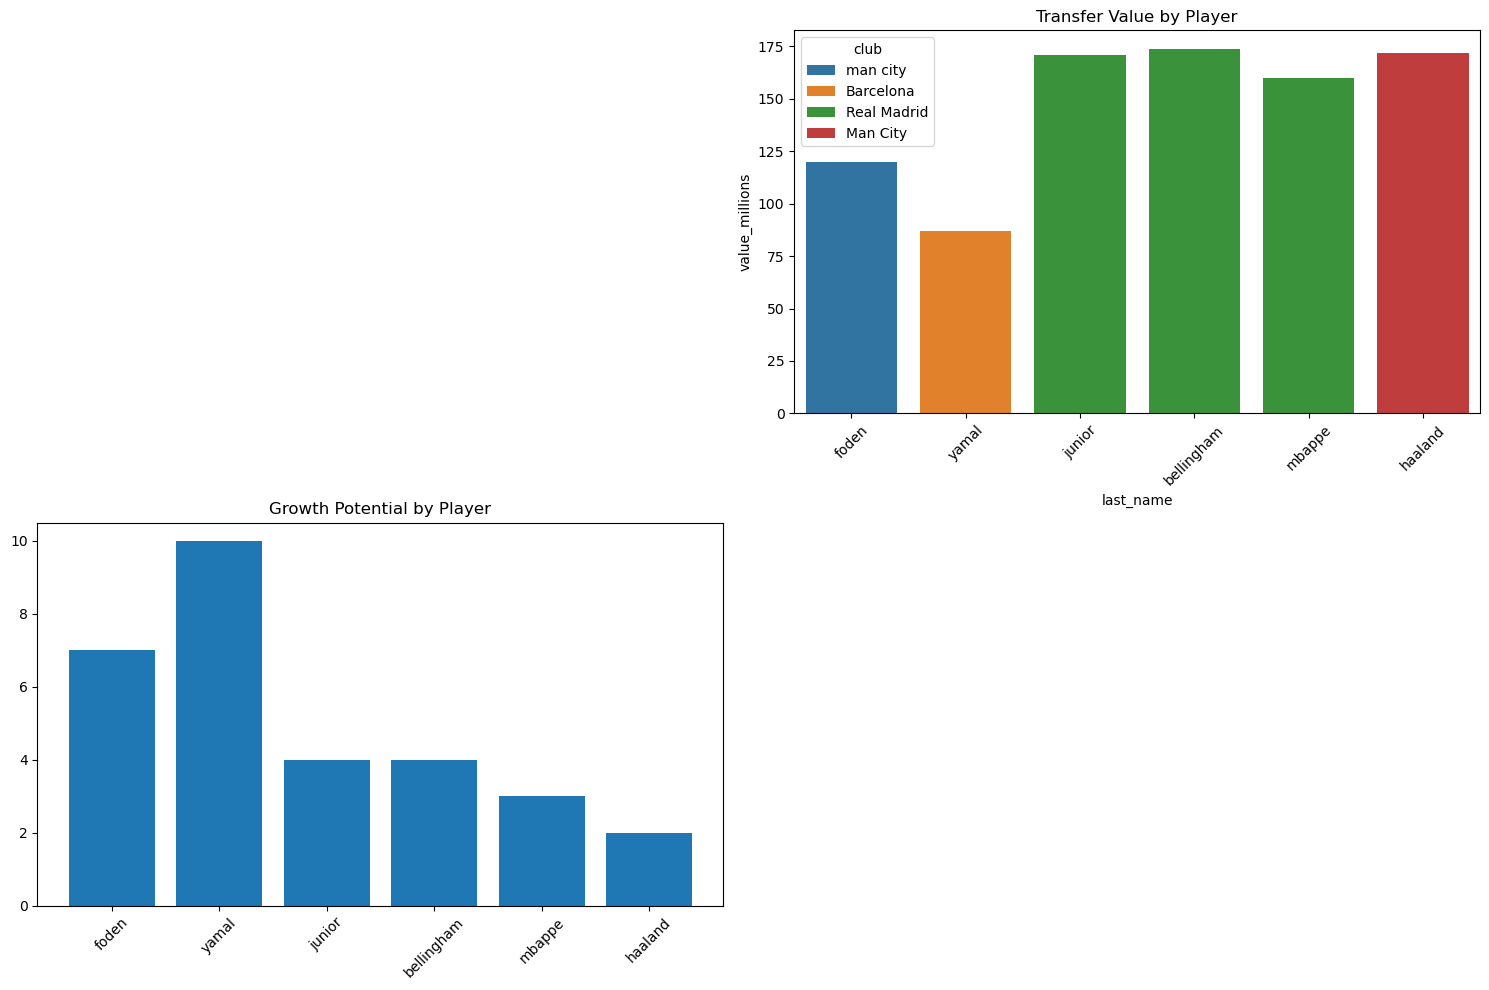


FIFA Database Management
1. Update player rating
2. Update player value
3. Add new player
4. View all players
5. Exit



Enter your choice (1-5):  4



All Players:
    last_name first_name  age  max_potential  current_rating  growth  \
0       foden       phil   24             89              82       7   
1       yamal     lamine   16             94              84      10   
2      junior       vini   23             94              90       4   
3  bellingham       jude   21             94              90       4   
4      mbappe     kylian   25             93              90       3   
5     haaland     erling   23             93              91       2   

   value_millions         club  
0             120     man city  
1              87    Barcelona  
2             171  Real Madrid  
3             174  Real Madrid  
4             160  Real Madrid  
5             172     Man City  

FIFA Database Management
1. Update player rating
2. Update player value
3. Add new player
4. View all players
5. Exit


In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a new database connection with a different name
connection = sqlite3.connect('fifa25_new.db')
cursor = connection.cursor()

# Create tables
cursor.execute('''CREATE TABLE IF NOT EXISTS wonder_kids
                 (last_name TEXT PRIMARY KEY, 
                  first_name TEXT, 
                  age INTEGER, 
                  max_potential INTEGER, 
                  current_rating INTEGER, 
                  growth INTEGER)''')

cursor.execute('''CREATE TABLE IF NOT EXISTS transfer_data
                 (last_name TEXT PRIMARY KEY, 
                  value_millions INTEGER, 
                  club TEXT)''')

# Prepare data
wonder_kids_data = [
    ('yamal', 'lamine', 16, 94, 84, 10),
    ('junior', 'vini', 23, 94, 90, 4),
    ('bellingham', 'jude', 21, 94, 90, 4),
    ('mbappe', 'kylian', 25, 93, 90, 3),
    ('haaland', 'erling', 23, 93, 91, 2)
]

transfer_data = [
    ('yamal', 87, 'Barcelona'),
    ('junior', 171, 'Real Madrid'),
    ('bellingham', 174, 'Real Madrid'),
    ('mbappe', 160, 'Real Madrid'),
    ('haaland', 172, 'Man City')
]

# to allow testing
cursor.executemany('REPLACE INTO wonder_kids VALUES (?,?,?,?,?,?)', wonder_kids_data)
cursor.executemany('REPLACE INTO transfer_data VALUES (?,?,?)', transfer_data)

# Commit changes
connection.commit()

wonder_kids_df = pd.read_sql_query("SELECT * FROM wonder_kids", connection)
transfer_df = pd.read_sql_query("SELECT * FROM transfer_data", connection)

# Print DataFrames
#print("Wonder Kids:")
#print(wonder_kids_df)
#print("\nTransfer Data:")
#print(transfer_df)

combined_df = pd.merge(wonder_kids_df, transfer_df, on='last_name')
print(combined_df)

#Query 1 - change player rating

def update_player_rating(player_last_name, new_rating):
    connection = sqlite3.connect('fifa25_new.db')
    cursor = connection.cursor()
    
    try:
        # Update the rating
        cursor.execute('''
            UPDATE wonder_kids 
            SET current_rating = ?, 
                growth = max_potential - ?
            WHERE last_name = ?
        ''', (new_rating, new_rating, player_last_name))
        
        if cursor.rowcount == 0:
            print(f"No player found with last name: {player_last_name}")
        else:
            print(f"Successfully updated {player_last_name}'s rating to {new_rating}")
        
        connection.commit()
    except sqlite3.Error as e:
        print(f"An error occurred: {e}")
    finally:
        connection.close()
#update player value
def update_player_value(player_last_name, new_value):
    connection = sqlite3.connect('fifa25_new.db')
    cursor = connection.cursor()
    
    try:
        cursor.execute('''
            UPDATE transfer_data 
            SET value_millions = ? 
            WHERE last_name = ?
        ''', (new_value, player_last_name))
        
        if cursor.rowcount == 0:
            print(f"No player found with last name: {player_last_name}")
        else:
            print(f"Successfully updated {player_last_name}'s value to {new_value}M")
        
        connection.commit()
    except sqlite3.Error as e:
        print(f"An error occurred: {e}")
    finally:
        connection.close()
#add new player
def add_new_player(last_name, first_name, age, max_potential, current_rating, value_millions, club):
    connection = sqlite3.connect('fifa25_new.db')
    cursor = connection.cursor()
    
    try:
        # Calculate growth
        growth = max_potential - current_rating
        
        # Insert into wonder_kids table
        cursor.execute('''
            INSERT INTO wonder_kids (last_name, first_name, age, max_potential, current_rating, growth)
            VALUES (?, ?, ?, ?, ?, ?)
        ''', (last_name, first_name, age, max_potential, current_rating, growth))
        
        # Insert into transfer_data table
        cursor.execute('''
            INSERT INTO transfer_data (last_name, value_millions, club)
            VALUES (?, ?, ?)
        ''', (last_name, value_millions, club))
        
        connection.commit()
        print(f"Successfully added {first_name} {last_name} to the database")
        
    except sqlite3.Error as e:
        print(f"An error occurred: {e}")
    finally:
        connection.close()


# Create a figure with multiple subplots
plt.figure(figsize=(15, 10))


# Plot 2: Age vs Value
plt.subplot(2, 2, 2)
sns.barplot(data=combined_df, x='last_name', y='value_millions', hue='club')
plt.xticks(rotation=45)
plt.title('Transfer Value by Player')

# Plot 3: Growth Potential
plt.subplot(2, 2, 3)
plt.bar(combined_df['last_name'], combined_df['growth'])
plt.xticks(rotation=45)
plt.title('Growth Potential by Player')

plt.tight_layout()
plt.show()

connection = sqlite3.connect('fifa25_new.db')


connection.close()

def main():
    while True:
        print("\nFIFA Database Management")
        print("1. Update player rating")
        print("2. Update player value")
        print("3. Add new player")    
        print("4. View all players")
        print("5. Exit")
        
        choice = input("\nEnter your choice (1-5): ")
        
        if choice == '1':
            last_name = input("Enter player's last name: ")
            new_rating = int(input("Enter new rating: "))
            update_player_rating(last_name, new_rating)
            
        elif choice == '2':
            last_name = input("Enter player's last name: ")
            new_value = int(input("Enter new value (in millions): "))
            update_player_value(last_name, new_value)
            
        elif choice == '3':
            last_name = input("Enter last name: ")
            first_name = input("Enter first name: ")
            age = int(input("Enter age: "))
            max_potential = int(input("Enter max potential (0-99): "))
            current_rating = int(input("Enter current rating (0-99): "))
            value_millions = int(input("Enter value in millions: "))
            club = input("Enter club name: ")
            
            add_new_player(last_name, first_name, age, max_potential, 
                          current_rating, value_millions, club)
      
            
        elif choice == '4':
            connection = sqlite3.connect('fifa25_new.db')
            df = pd.read_sql_query('''
                SELECT w.*, t.value_millions, t.club
                FROM wonder_kids w
                JOIN transfer_data t ON w.last_name = t.last_name
            ''', connection)
            print("\nAll Players:")
            print(df)
            connection.close()
            
        elif choice == '5':
            print("Goodbye!")
            break
        
        else:
            print("Invalid choice. Please try again.")

# Run the program
if __name__ == "__main__":
    main()

